# **Customer Segmentation using Machine Learning in Python**

In [2]:
# Upload The Customers Data Set
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [37]:
# Import all dependencies and read necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
customers_df = pd.read_csv("Mall_Customers.csv")

In [4]:
# Basic Data Exploration
print(customers_df.head())
print(customers_df.info())
print(customers_df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

## **Customer Gender Visualization**

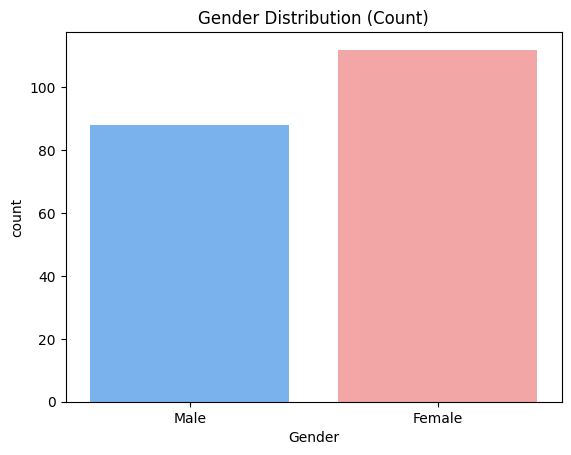

In [5]:
# Countplot plot for Gender counts
# Define colors for each gender
gender_colors = {
    'Male':'#66B2FF' ,
    'Female':'#FF9999'
}

# Generate color list based on the gender counts index order
gender_counts = customers_df['Gender'].value_counts()
gender_colors_list = [gender_colors[gender] for gender in gender_counts.index]

# Countplot for Gender counts
sns.countplot(x='Gender', data=customers_df, hue="Gender",palette=gender_colors)
plt.title('Gender Distribution (Count)')
plt.show()

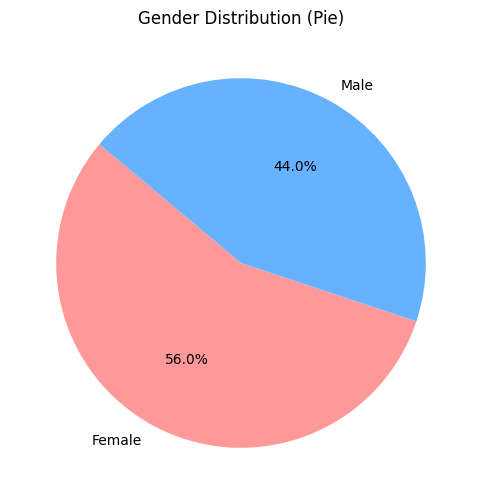

In [6]:
# Pie plot for gender counts
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=gender_colors_list)
plt.title('Gender Distribution (Pie)')
plt.show()

From the above graph, we conclude that the percentage of females is 56%, whereas the percentage of male in the customer dataset is 44%.

## **Visualization of Age Distribution**

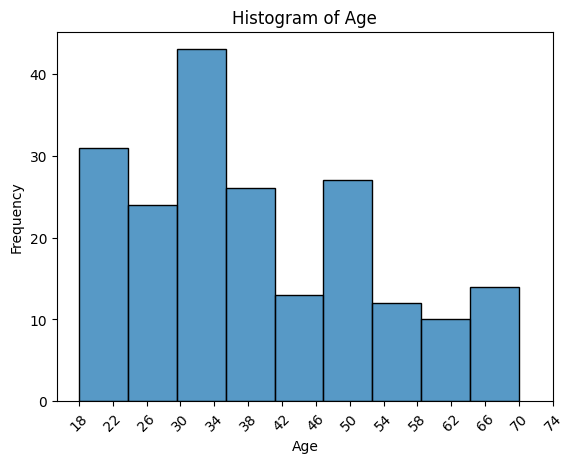

In [7]:
# Histogram for Age distribution
iqr = customers_df['Age'].quantile(0.75) - customers_df['Age'].quantile(0.25)
bin_width = 2 * iqr * len(customers_df['Age'])**(-1/3)
num_bins = int((customers_df['Age'].max() - customers_df['Age'].min()) / bin_width)
sns.histplot(x="Age",bins=num_bins+2,data=customers_df)
plt.xticks(np.arange(min(customers_df['Age']), max(customers_df['Age']) + 8, 4),rotation=45)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

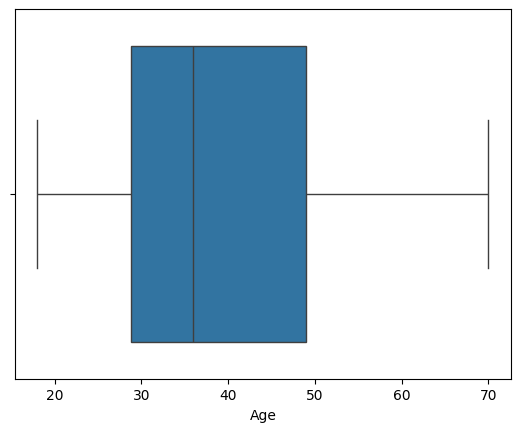

In [8]:
# Age Box PLot
sns.boxplot(x='Age',data=customers_df)
plt.show()

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70.

## **Analysis of the Annual Income of the Customers**

       Annual Income (k$)
count          200.000000
mean            60.560000
std             26.264721
min             15.000000
25%             41.500000
50%             61.500000
75%             78.000000
max            137.000000


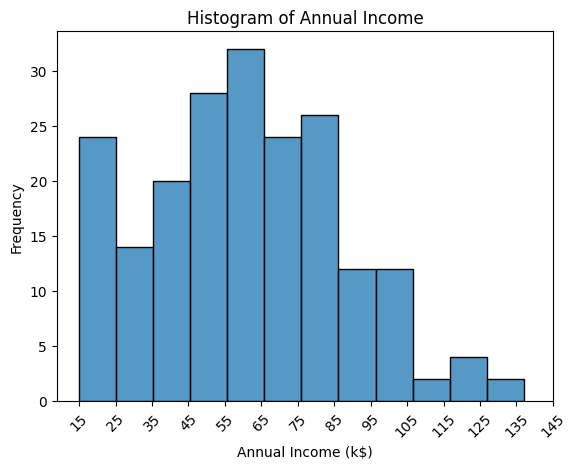

In [9]:
# Histogram of income ditribution
print(customers_df[['Annual Income (k$)']].describe())
iqr_ = customers_df["Annual Income (k$)"].quantile(0.75) - customers_df["Annual Income (k$)"].quantile(0.25)
bin_width = 2 * iqr_ * len(customers_df['Annual Income (k$)'])**(-1/3)
num_bins = int((customers_df['Annual Income (k$)'].max() - customers_df['Annual Income (k$)'].min()) / bin_width)
sns.histplot(x="Annual Income (k$)",bins=num_bins+3,data=customers_df)
plt.xticks(np.arange(min(customers_df['Annual Income (k$)']), max(customers_df['Annual Income (k$)']) + 10, 10),rotation=45)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.show()


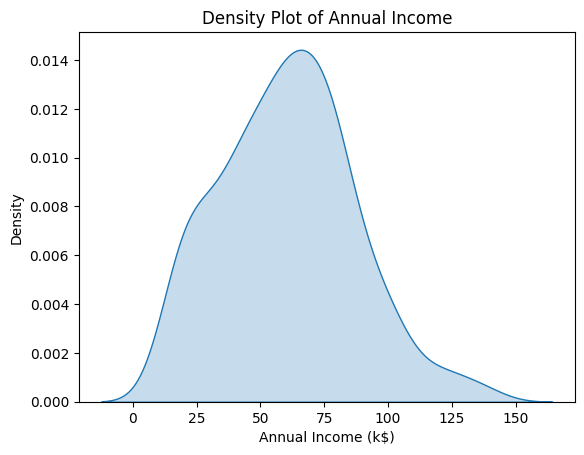

In [10]:
# Density plot
sns.kdeplot(data=customers_df, x='Annual Income (k$)', fill=True)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.title('Density Plot of Annual Income')
plt.show()

In [13]:
# From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56.
# In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

# **Analyzing Spending Score of the Customers**

       Spending Score (1-100)
count              200.000000
mean                50.200000
std                 25.823522
min                  1.000000
25%                 34.750000
50%                 50.000000
75%                 73.000000
max                 99.000000


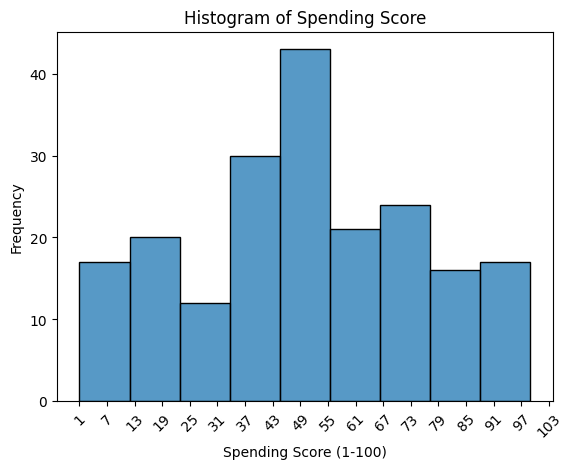

In [14]:
# Histogram of Spending Score distribution
print(customers_df[['Spending Score (1-100)']].describe())
iqr_spending = customers_df['Spending Score (1-100)'].quantile(0.75) - customers_df['Spending Score (1-100)'].quantile(0.25)
bin_width_spending = 2 * iqr_spending * len(customers_df['Spending Score (1-100)'])**(-1/3)
num_bins_spending = int((customers_df['Spending Score (1-100)'].max() - customers_df['Spending Score (1-100)'].min()) / bin_width_spending)
sns.histplot(x="Spending Score (1-100)", bins=num_bins_spending+2 , data=customers_df)
plt.xticks(np.arange(min(customers_df['Spending Score (1-100)']), max(customers_df['Spending Score (1-100)']) + 10, 6), rotation=45)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Histogram of Spending Score')
plt.show()




The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. From the histogram, we conclude that customers between class 43 and 57 have the highest spending score among all the classes.

## **K-means Algorithm**

### Determining Optimal Clusters

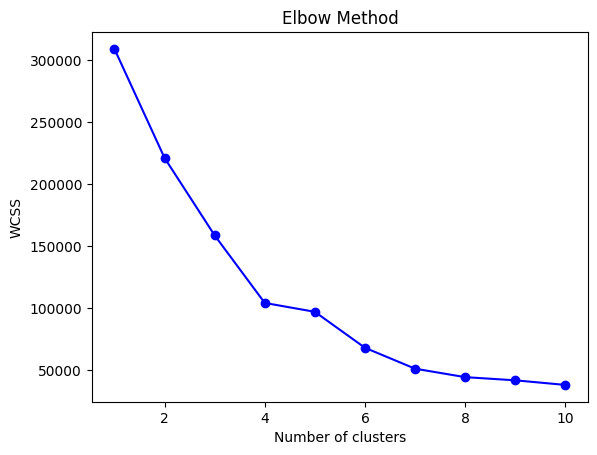

In [31]:

# Assuming 'customers_df' is already defined with appropriate columns
X = customers_df.iloc[:, [2,3,4]].values

# List to store the WCSS values
wcss = []

# Calculate WCSS for each cluster count from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method with points for each cluster number
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow point appears to be around 5 clusters.
This suggests that having 5 clusters might be a good choice for your dataset.

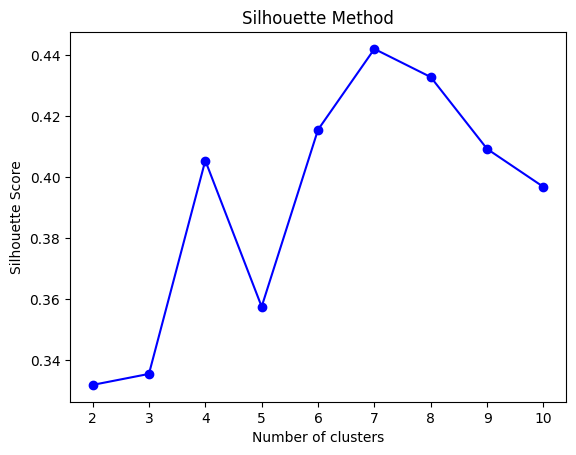

Optimal number of clusters (based on Silhouette score): 7


In [41]:
# Silhouette Method
silhouette_avg = []

# Calculate silhouette score for each cluster count from 2 to 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_avg, marker='o', linestyle='-', color='b')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_k = np.argmax(silhouette_avg) +2
print(f"Optimal number of clusters (based on Silhouette score): {optimal_k}")

I will be working with the elbow method results which are 5 clusters

### Performing the KMeans clustering

In [45]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create a K-Means model with desired number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the model to the standardized data
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_
print(labels)


[2 2 3 2 2 2 3 2 0 2 0 2 0 2 3 2 3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 3 2 0 2 0 2 0 2 0 3 3 3 0 2 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 1 1 3 1 4 1 4 1 4 1 3 1 3 1 4 1 3 1 4 1 3 1 3 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


## **Dimensionality Reduction**

In [59]:
from sklearn.decomposition import PCA

# Assuming 'customer_data' is your DataFrame
X = customers_df.iloc[:, [2,3,4]]

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Get the loadings (eigenvectors)
loadings = pca.components_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for better visualization
# Change 1: Use a separate DataFrame for explained variance ratio
explained_variance_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio},
                                      index=['PC1', 'PC2'])

loading_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=X.columns)

# Change 2: Print both DataFrames or merge them if needed
print("Loading DataFrame:")
print(loading_df)
print("\nExplained Variance DataFrame:")
print(explained_variance_df)
total_explained_variance = explained_variance_ratio.sum()
print(f"Total Explained Variance by PC1 and PC2: {total_explained_variance:.2f}")


Loading DataFrame:
                             PC1       PC2
Age                    -0.188974  0.130965
Annual Income (k$)      0.588641  0.808376
Spending Score (1-100)  0.785997 -0.573914

Explained Variance DataFrame:
     Explained Variance Ratio
PC1                  0.451253
PC2                  0.440985
Total Explained Variance by PC1 and PC2: 0.89


89% of the variance in the original data is captured by these two components, suggesting that these two dimensions represent the data's structure well.



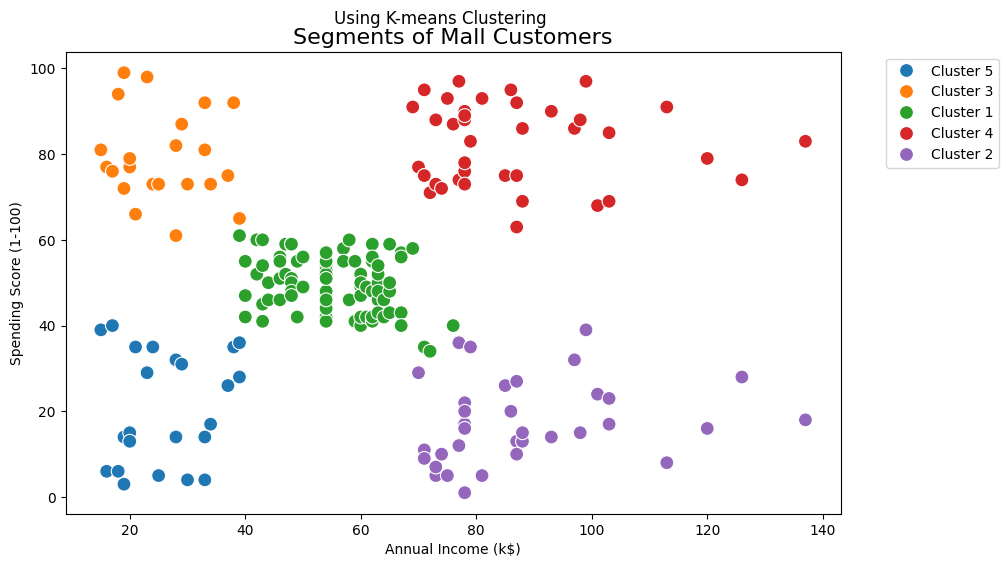

In [63]:
X = customers_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Perform K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1)
customers_df['Cluster'] = kmeans.fit_predict(X)

# Map cluster numbers to labels
cluster_labels = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5',
}
customers_df['Cluster Label'] = customers_df['Cluster'].map(cluster_labels)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customers_df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster Label',
    palette='tab10',
    s=100
)
plt.title("Segments of Mall Customers", fontsize=16)
plt.suptitle("Using K-means Clustering", y=0.95, fontsize=12)
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

-spending score contributes highly to pc1

-annual income contributes highly to pc2
- Five distinct clusters are identified:
  - Cluster 1: Customers with average income and spending scores
  - Cluster 2: Customers with low income and high spending scores
  - Cluster 3: A high annual income and low yearly spend.
  - Cluster 4: Customers with avg income and avg spending scores
  - Cluster 5: Customers with low income and low spending scores

Interpretation of Clusters:
Based on the resulting clusters, targeted marketing strategies can be implemented for each group. For example:
* Cluster 2 (Low income, High spenders) are potentially valuable and should be retained via loyalty programs or rewards.
* Cluster 3 (High income, Low spenders) might need incentives or personalized recommendations to increase their spending.
* Cluster 5 (Low income, Low spenders) might be targeted with budget-friendly options or promotions to encourage spending.

## **Do age and gender have major contributions to defining the clusters?**

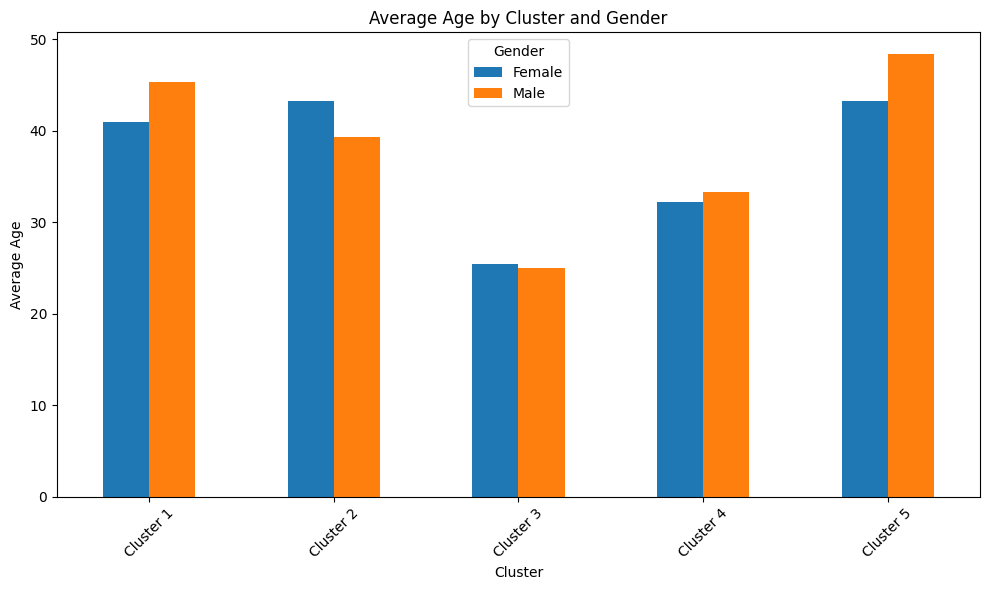

In [71]:

# Group data by cluster and gender, then calculate the mean age for each group.
age_gender_cluster = customers_df.groupby(['Cluster Label', 'Gender'])['Age'].mean().unstack()

# Plot the mean age for each cluster and gender
age_gender_cluster.plot(kind='bar', figsize=(10, 6))
plt.title('Average Age by Cluster and Gender')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


- clusters 1,2 and 5 : are carecterized by an avg age above 40 which can be helpful in deciding which approach to take when targetting them.
- cluster 3 is carecterized by a relatively low avg age and since they have high income maybe the solution is to customize the products to their list of needs.
- Age is not really a defining feature in this dataset